In [1]:
import os

import numpy as np
import pandas as pd

from analysis import viscoplastic, utilities, common
reader = viscoplastic.data.reader
from everest.h5anchor import Fetch, Scope
from everest.window import Canvas, plot, raster, DataChannel as Channel, get_cmap
%matplotlib inline

In [2]:
inputs, initials, finals, averages = viscoplastic.data.get_summary_frames()
selection = (inputs['tauRef'] > 4) & (inputs['aspect'] != 'max')
inputs, initials, finals, averages = (
    frm.loc[selection] for frm in (inputs, initials, finals, averages)
    )
inputs['aspect'] = inputs['aspect'].astype(float)

In [3]:
initialrasters, finalrasters = viscoplastic.data.get_rasters()

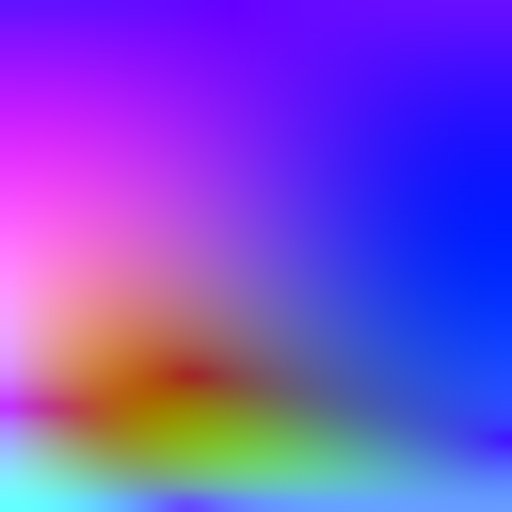

In [4]:
initialrasters[inputs.index[0]].resize((512, 512))

In [5]:
from everest.window.animate import animate

In [6]:
animate(initialrasters.path)

'/home/morpheus/workspace/mount/analysis/viscoplastic/bcclfxzvjitgtbsv.mp4'

In [ ]:
finalrasters[inputs.index[0]].resize((512, 512))

In [ ]:
sel = inputs['aspect'] == 1
canvas = Canvas(size = (12, 12), colour = 'white', fill = 'black')
ax = canvas.make_ax()
ax.scatter(
    Channel(inputs.loc[sel]['tauRef'], lims = (4.9, 6.1), capped = (True, True)),
    np.log10(averages.loc[sel]['Nu']),
    100 * ((1. - inputs.loc[sel]['f']) + 1) ** 2,
    inputs.loc[sel]['H'],
    marker = "_",
    cmap = 'plasma',
    )
canvas.show()

In [ ]:
sel = (inputs['aspect'] == 1) & (inputs['f'] == 1.)
canvas = Canvas(size = (12, 12), colour = 'white', fill = 'black')
ax = canvas.make_ax()
ax.scatter(
    Channel(inputs.loc[sel]['tauRef'], lims = (4.9, 6.1), capped = (True, True)),
    np.log10(averages.loc[sel]['Nu']),
    100 * initials.loc[sel]['Nu_freq'],
    inputs.loc[sel]['H'],
    marker = "_",
    cmap = 'plasma',
    )
canvas.show()

In [ ]:
set(initials['Nu_freq'])

In [ ]:
sel = (inputs['aspect'] == 1) & (inputs['f'] == 1.) & (inputs['H'] == 0)
plot.scatter(
    inputs.loc[sel]['tauRef'],
    np.log10(averages.loc[sel]['Nu']),
    c = initials.loc[sel]['Nu_freq'],
    size = (12, 12)
    )

In [ ]:
sel = (inputs['aspect'] == 1) & (inputs['f'] == 1.) & (inputs['H'] == 0)
plot.scatter(
    Channel(initials.loc[sel]['Nu_freq'], lims = (0, 4), label = 'initial freq'),
    Channel(finals.loc[sel]['Nu_freq'], lims = (0, 4), label = 'final_freq'),
    size = (6, 6)
    )

In [ ]:
sel1 = (inputs['aspect'] == 1) & (inputs['f'] == 1.) & (inputs['H'] == 0) & (initials['Nu_freq'] == 3)
sel2 = sel1 & (finals['Nu_freq'] < 3)

In [ ]:
*rasters, t = reader[tuple(os.path.join('iijaadaesh-eimuskist', 'outputs', key) for key in ('theta', 'epsilon', 'psi', 't'))]

In [ ]:
from everest.window import raster

In [ ]:
Video(raster.animate(rasters, t, size = 16, pts = 0.5), embed = True, width = 500)